# IPython: beyond plain Python

When executing code in IPython, all valid Python syntax works as-is, but IPython provides a number of features designed to make the interactive experience more fluid and efficient.

## First things first: running code, getting help

In the notebook, to run a cell of code, hit `Shift-Enter`. This executes the cell and puts the cursor in the next cell below, or makes a new one if you are at the end.  Alternately, you can use:
    
- `Alt-Enter` to force the creation of a new cell unconditionally (useful when inserting new content in the middle of an existing notebook).
- `Control-Enter` executes the cell and keeps the cursor in the same cell, useful for quick experimentation of snippets that you don't need to keep permanently.

In [1]:
print "Hi"

Hi


Getting help:

In [2]:
?

Typing `object_name?` will print all sorts of details about any object, including docstrings, function definition lines (for call arguments) and constructor details for classes.

In [3]:
import collections
collections.namedtuple?

In [4]:
collections.Counter??

In [5]:
*int*?

An IPython quick reference card:

In [6]:
%quickref

## Tab completion

Tab completion, especially for attributes, is a convenient way to explore the structure of any object you’re dealing with. Simply type `object_name.<TAB>` to view the object’s attributes. Besides Python objects and keywords, tab completion also works on file and directory names.

In [8]:
collections.

## The interactive workflow: input, output, history

In [7]:
2+10

12

In [8]:
_+10

22

You can suppress the storage and rendering of output if you append `;` to the last cell (this comes in handy when plotting with matplotlib, for example):

In [9]:
10+20;

In [10]:
_

22

The output is stored in `_N` and `Out[N]` variables:

In [11]:
_10 == Out[10]

True

And the last three have shorthands for convenience:

In [12]:
print 'last output:', _
print 'next one   :', __
print 'and next   :', ___

last output: True
next one   : 22
and next   : 22


In [13]:
In[11]

u'_10 == Out[10]'

In [14]:
_i

u'In[11]'

In [15]:
_ii

u'In[11]'

In [16]:
print 'last input:', _i
print 'next one  :', _ii
print 'and next  :', _iii

last input: _ii
next one  : _i
and next  : In[11]


In [17]:
%history -n 1-5

   1: print "Hi"
   2: ?
   3:
import collections
collections.namedtuple?
   4: collections.Counter??
   5: *int*?


**Exercise**

Write the last 10 lines of history to a file named `log.py`.

## Accessing the underlying operating system

In [18]:
!pwd

/home/fperez/ipython/tutorial/notebooks


In [19]:
files = !ls
print "My current directory's files:"
print files

My current directory's files:
['BackgroundJobs.ipynb', 'Custom Display Logic.ipynb', 'Customizing IPython - Condensed.ipynb', 'Customizing IPython - Config.ipynb', 'Customizing IPython - Extensions.ipynb', 'Customizing IPython - Magics.ipynb', 'data', 'figs', 'flare.json', 'Index.ipynb', 'Interactive Widgets.ipynb', 'IPython - beyond plain Python.ipynb', 'kernel-embedding', 'Markdown Cells.ipynb', 'myscript.py', 'nbconvert_arch.png', 'NbConvert from command line.ipynb', 'NbConvert Python library.ipynb', 'Notebook and javascript extension.ipynb', 'Notebook Basics.ipynb', 'Overview of IPython.parallel.ipynb', 'parallel', 'Rich Display System.ipynb', 'Running a Secure Public Notebook.ipynb', 'Running Code.ipynb', 'Sample.ipynb', 'soln', 'Terminal usage.ipynb', 'text_analysis.py', 'Typesetting Math Using MathJax.ipynb']


In [20]:
!echo $files

[BackgroundJobs.ipynb, Custom Display Logic.ipynb, Customizing IPython - Condensed.ipynb, Customizing IPython - Config.ipynb, Customizing IPython - Extensions.ipynb, Customizing IPython - Magics.ipynb, data, figs, flare.json, Index.ipynb, Interactive Widgets.ipynb, IPython - beyond plain Python.ipynb, kernel-embedding, Markdown Cells.ipynb, myscript.py, nbconvert_arch.png, NbConvert from command line.ipynb, NbConvert Python library.ipynb, Notebook and javascript extension.ipynb, Notebook Basics.ipynb, Overview of IPython.parallel.ipynb, parallel, Rich Display System.ipynb, Running a Secure Public Notebook.ipynb, Running Code.ipynb, Sample.ipynb, soln, Terminal usage.ipynb, text_analysis.py, Typesetting Math Using MathJax.ipynb]


In [21]:
!echo {files[0].upper()}

BACKGROUNDJOBS.IPYNB


Note that all this is available even in multiline blocks:

In [27]:
import os
for i,f in enumerate(files):
    if f.endswith('ipynb'):
        !echo {"%02d" % i} - "{os.path.splitext(f)[0]}"
    else:
        print '--'

00 - BackgroundJobs
01 - Custom Display Logic
02 - Customizing IPython - Condensed
03 - Customizing IPython - Config
04 - Customizing IPython - Extensions
05 - Customizing IPython - Magics
--
--
--
09 - Index
10 - Interactive Widgets
11 - IPython - beyond plain Python
--
13 - Markdown Cells
--
--
16 - NbConvert from command line
17 - NbConvert Python library
18 - Notebook and javascript extension
19 - Notebook Basics
20 - Overview of IPython.parallel
--
22 - Rich Display System
23 - Running a Secure Public Notebook
24 - Running Code
25 - Sample
--
27 - Terminal usage
--
29 - Typesetting Math Using MathJax


## Beyond Python: magic functions

The IPyhton 'magic' functions are a set of commands, invoked by prepending one or two `%` signs to their name, that live in a namespace separate from your normal Python variables and provide a more command-like interface.  They take flags with `--` and arguments without quotes, parentheses or commas. The motivation behind this system is two-fold:
    
- To provide an orthogonal namespace for controlling IPython itself and exposing other system-oriented functionality.

- To expose a calling mode that requires minimal verbosity and typing while working interactively.  Thus the inspiration taken from the classic Unix shell style for commands.

In [28]:
%magic

Line vs cell magics:

In [29]:
%timeit range(10)

10000000 loops, best of 3: 190 ns per loop


In [30]:
%%timeit
range(10)
range(100)

1000000 loops, best of 3: 888 ns per loop


Line magics can be used even inside code blocks:

In [31]:
for i in range(5):
    size = i*100
    print 'size:',size, 
    %timeit range(size)

size: 010000000 loops, best of 3: 129 ns per loop
 size: 1001000000 loops, best of 3: 649 ns per loop
 size: 2001000000 loops, best of 3: 1.09 µs per loop
 size: 3001000000 loops, best of 3: 1.74 µs per loop
 size: 400100000 loops, best of 3: 2.72 µs per loop



Magics can do anything they want with their input, so it doesn't have to be valid Python:

In [32]:
%%bash
echo "My shell is:" $SHELL
echo "My memory status is:"
free

My shell is: /bin/bash
My memory status is:
             total       used       free     shared    buffers     cached
Mem:       7870888    6389328    1481560          0     662860    2505172
-/+ buffers/cache:    3221296    4649592
Swap:      3905532       4852    3900680


Another interesting cell magic: create any file you want locally from the notebook:

In [33]:
%%writefile test.txt
This is a test file!
It can contain anything I want...

And more...

Writing test.txt


In [34]:
!cat test.txt

This is a test file!
It can contain anything I want...

And more...

Let's see what other magics are currently defined in the system:

In [35]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %cl  %clear  %clk  %colors  %config  %connect_info  %cp  %d  %dd  %debug  %dhist  %dirs  %dl  %doctest_mode  %dx  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%jav

## Running normal Python code: execution and errors

Not only can you input normal Python code, you can even paste straight from a Python or IPython shell session:

In [36]:
>>> # Fibonacci series:
... # the sum of two elements defines the next
... a, b = 0, 1
>>> while b < 10:
...     print b
...     a, b = b, a+b

1
1
2
3
5
8


In [37]:
In [1]: for i in range(10):
   ...:     print i,
   ...:     

0 1 2 3 4 5 6 7 8 9


And when your code produces errors, you can control how they are displayed with the `%xmode` magic:

In [38]:
%%writefile mod.py

def f(x):
    return 1.0/(x-1)

def g(y):
    return f(y+1)

Writing mod.py


Now let's call the function `g` with an argument that would produce an error:

In [39]:
import mod
mod.g(0)

ZeroDivisionError: float division by zero

In [40]:
%xmode plain
mod.g(0)

Exception reporting mode: Plain


ZeroDivisionError: float division by zero

In [41]:
%xmode verbose
mod.g(0)

Exception reporting mode: Verbose


ZeroDivisionError: float division by zero

The default `%xmode` is "context", which shows additional context but not all local variables.  Let's restore that one for the rest of our session.

In [42]:
%xmode context

Exception reporting mode: Context


## Running code in other languages with special `%%` magics

In [43]:
%%perl
@months = ("July", "August", "September");
print $months[0];

July

In [44]:
%%ruby
name = "world"
puts "Hello #{name.capitalize}!"

Hello World!


### Exercise

Write a cell that executes in Bash and prints your current working directory as well as the date.

Apologies to Windows users who may not have Bash available, not sure how to obtain the equivalent result with `cmd.exe` or Powershell.

In [ ]:
%load soln/bash-script

## Raw Input in the notebook

Since 1.0 the IPython notebook web application support `raw_input` which for example allow us to invoke the `%debug` magic in the notebook:

In [45]:
mod.g(0)

ZeroDivisionError: float division by zero

In [38]:
%debug

> /Users/bussonniermatthias/ipython-in-depth/notebooks/mod.py(3)f()
      2 def f(x):
----> 3     return 1.0/(x-1)
      4 

ipdb> x
1
ipdb> up
> /Users/bussonniermatthias/ipython-in-depth/notebooks/mod.py(6)g()
      4 
      5 def g(y):
----> 6     return f(y+1)

ipdb> y
0
ipdb> up
> <ipython-input-37-5e708f13c839>(1)<module>()
----> 1 mod.g(0)

ipdb> exit


Don't foget to exit your debugging session. Raw input can of course be use to ask for user input:

In [39]:
enjoy = raw_input('Are you enjoying this tutorial ?')
print 'enjoy is :', enjoy

Are you enjoying this tutorial ?Yes !
enjoy is : Yes !


## Plotting in the notebook

This magic configures matplotlib to render its figures inline:

In [46]:
%matplotlib inline

In [47]:
import numpy as np
import matplotlib.pyplot as plt

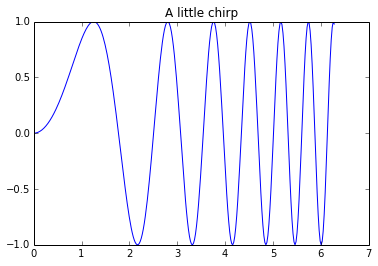

In [48]:
x = np.linspace(0, 2*np.pi, 300)
y = np.sin(x**2)
plt.plot(x, y)
plt.title("A little chirp")
fig = plt.gcf()  # let's keep the figure object around for later...

## The IPython kernel/client model

In [43]:
%connect_info

{
  "stdin_port": 50023, 
  "ip": "127.0.0.1", 
  "control_port": 50024, 
  "hb_port": 50025, 
  "signature_scheme": "hmac-sha256", 
  "key": "b54b8859-d64d-48bb-814a-909f9beb3316", 
  "shell_port": 50021, 
  "transport": "tcp", 
  "iopub_port": 50022
}

Paste the above JSON into a file, and connect with:
    $> ipython <app> --existing <file>
or, if you are local, you can connect with just:
    $> ipython <app> --existing kernel-30f00f4a-230c-4e64-bea5-0e5f6a52cb40.json 
or even just:
    $> ipython <app> --existing 
if this is the most recent IPython session you have started.


We can connect automatically a Qt Console to the currently running kernel with the `%qtconsole` magic, or by typing `ipython console --existing <kernel-UUID>` in any terminal:

In [83]:
%qtconsole